In [121]:
import json
import spotipy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
with open('../data/pop_track_id_features_and_analysis.json') as f:
    features_and_analysis = json.load(f)

In [12]:
song_ids = features_and_analysis.keys()

In [13]:
song_ids_list = list(song_ids)

In [14]:
# Features, type is list
print(features_and_analysis['15O20RQyWJgKrkHID9ynT9'][0][0])

{'danceability': 0.443, 'energy': 0.558, 'key': 0, 'loudness': -5.436, 'mode': 1, 'speechiness': 0.0624, 'acousticness': 0.441, 'instrumentalness': 0, 'liveness': 0.163, 'valence': 0.248, 'tempo': 116.838, 'type': 'audio_features', 'id': '15O20RQyWJgKrkHID9ynT9', 'uri': 'spotify:track:15O20RQyWJgKrkHID9ynT9', 'track_href': 'https://api.spotify.com/v1/tracks/15O20RQyWJgKrkHID9ynT9', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/15O20RQyWJgKrkHID9ynT9', 'duration_ms': 233337, 'time_signature': 4}


In [143]:
# Analysis, type is dictionary
print(features_and_analysis['15O20RQyWJgKrkHID9ynT9'][1].keys())
print("TRACK")
print(features_and_analysis['15O20RQyWJgKrkHID9ynT9'][1]['track'])

print("BARS")
print(features_and_analysis['15O20RQyWJgKrkHID9ynT9'][1]['sections'])


dict_keys(['meta', 'track', 'bars', 'beats', 'tatums', 'sections', 'segments'])
TRACK
{'num_samples': 5145082, 'duration': 233.33705, 'sample_md5': '', 'offset_seconds': 0, 'window_seconds': 0, 'analysis_sample_rate': 22050, 'analysis_channels': 1, 'end_of_fade_in': 0.0, 'start_of_fade_out': 230.29551, 'loudness': -5.436, 'tempo': 116.838, 'tempo_confidence': 0.048, 'time_signature': 4, 'time_signature_confidence': 0.989, 'key': 0, 'key_confidence': 0.581, 'mode': 1, 'mode_confidence': 0.588, 'code_version': 3.15, 'echoprint_version': 4.12, 'synch_version': 1.0, 'rhythm_version': 1.0}
BARS
[{'start': 0.0, 'duration': 7.55561, 'confidence': 1.0, 'loudness': -18.004, 'tempo': 113.228, 'tempo_confidence': 0.219, 'key': 0, 'key_confidence': 0.0, 'mode': 1, 'mode_confidence': 0.0, 'time_signature': 4, 'time_signature_confidence': 0.7}, {'start': 7.55561, 'duration': 32.87778, 'confidence': 1.0, 'loudness': -9.152, 'tempo': 114.553, 'tempo_confidence': 0.291, 'key': 0, 'key_confidence': 0.0,

In [129]:
def compare_bars_of_two_songs(song_id_1, song_id_2, features_and_analysis):
    song_1_bars = features_and_analysis[song_id_1][1]['bars']
    song_2_bars = features_and_analysis[song_id_2][1]['bars']
    
    num_bars_1 = len(song_1_bars)
    num_bars_2 = len(song_2_bars)
    
    durations_bars_1 = [bar['duration'] for bar in song_1_bars]
    durations_bars_2 = [bar['duration'] for bar in song_2_bars]
    
    print("number of bars in song 1: ", num_bars_1)
    print("number of bars in song 2: ", num_bars_2)
    
    print("Average duration of bars in song 1: ", sum(durations_bars_1) / len(durations_bars_1))
    print("Average duration of bars in song 2: ", sum(durations_bars_2) / len(durations_bars_2))


In [17]:
compare_bars_of_two_songs(song_ids_list[0],song_ids_list[1], features_and_analysis)

number of bars in song 1:  114
number of bars in song 2:  95
Average duration of bars in song 1:  2.016471140350877
Average duration of bars in song 2:  2.411837052631579


In [139]:
def compare_loudness_of_two_songs(song_id_1, song_id_2, features_and_analysis):
    song_1_sections = features_and_analysis[song_id_1][1]['sections']
    song_2_sections = features_and_analysis[song_id_2][1]['sections']
    start_duration_loudness_1 = [(section['start'], section['duration'], section['loudness']) for section in song_1_sections]
    start_duration_loudness_2 = [(section['start'], section['duration'], section['loudness']) for section in song_2_sections]

    x_1 = [start for (start,_,_) in start_duration_loudness_1] 
    x_1 = [max(x_1) - start for start in x_1]
    y_1 = [-1 * loudness for (_,_,loudness) in start_duration_loudness_1]
    
    x_2 = [start for (start,_,_) in start_duration_loudness_2] 
    x_2 = [max(x_2) - start for start in x_2]
    y_2 = [-1 * loudness for (_,_,loudness) in start_duration_loudness_2]
   
    sns.lineplot(x_1,y_1, label="song_1")
    sns.lineplot(x_2,y_2, label="song_2")
    plt.xlabel("Time in seconds")
    plt.ylabel("Loudness")
    plt.show()
    

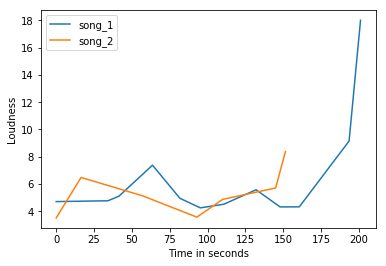

In [140]:
compare_loudness_of_two_songs(song_ids_list[0], song_ids_list[10], features_and_analysis)

In [146]:
def compare_tempo_of_two_songs(song_id_1, song_id_2, features_and_analysis):
    song_1_sections = features_and_analysis[song_id_1][1]['sections']
    song_2_sections = features_and_analysis[song_id_2][1]['sections']
    start_duration_tempo_1 = [(section['start'], section['duration'], section['tempo']) for section in song_1_sections]
    start_duration_tempo_2 = [(section['start'], section['duration'], section['tempo']) for section in song_2_sections]

    x_1 = [start for (start,_,_) in start_duration_tempo_1] 
    x_1 = [max(x_1) - start for start in x_1]
    y_1 = [tempo for (_,_,tempo) in start_duration_tempo_1]
    
    x_2 = [start for (start,_,_) in start_duration_tempo_2] 
    x_2 = [max(x_2) - start for start in x_2]
    y_2 = [tempo for (_,_,tempo) in start_duration_tempo_2]
   
    sns.lineplot(x_1,y_1, label="song_1")
    sns.lineplot(x_2,y_2, label="song_2")
    plt.xlabel("Time in seconds")
    plt.ylabel("tempo")
    plt.show()
    

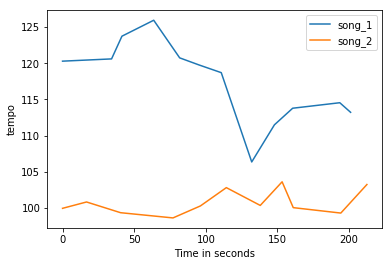

In [148]:
compare_tempo_of_two_songs(song_ids_list[0], song_ids_list[1], features_and_analysis)